In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...,...
10775,2023-09-11,180.070007,180.300003,177.339996,179.360001,179.360001,58953100
10776,2023-09-12,179.490005,180.130005,174.820007,176.300003,176.300003,90370200
10777,2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900
10778,2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800


In [3]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10775,2023-09-11,179.360001
10776,2023-09-12,176.300003
10777,2023-09-13,174.210007
10778,2023-09-14,175.740005


In [5]:
df['Date']

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10775    2023-09-11
10776    2023-09-12
10777    2023-09-13
10778    2023-09-14
10779    2023-09-15
Name: Date, Length: 10780, dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

<ipython-input-6-a8fdb6136c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10775   2023-09-11
10776   2023-09-12
10777   2023-09-13
10778   2023-09-14
10779   2023-09-15
Name: Date, Length: 10780, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-09-11,179.360001
2023-09-12,176.300003
2023-09-13,174.210007


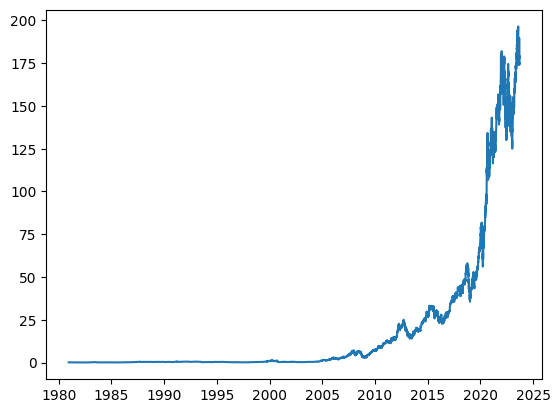

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [9]:
import numpy as np
import datetime
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = pd.to_datetime(first_date_str)
  last_date  = pd.to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,123.389999,122.540001,120.089996,120.589996
1,2021-03-26,122.540001,120.089996,120.589996,121.209999
2,2021-03-29,120.089996,120.589996,121.209999,121.389999
3,2021-03-30,120.589996,121.209999,121.389999,119.900002
4,2021-03-31,121.209999,121.389999,119.900002,122.150002
...,...,...,...,...,...
247,2022-03-17,150.619995,155.089996,159.589996,160.619995
248,2022-03-18,155.089996,159.589996,160.619995,163.979996
249,2022-03-21,159.589996,160.619995,163.979996,165.380005
250,2022-03-22,160.619995,163.979996,165.380005,168.820007


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

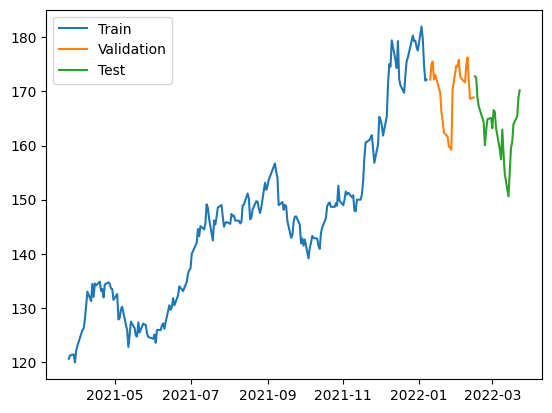

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 9s 87ms/step - loss: 21253.6328 - mean_absolute_error: 144.9960 - val_loss: 28671.9551 - val_mean_absolute_error: 169.2406
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 21103.8516 - mean_absolute_error: 144.4786 - val_loss: 28511.8398 - val_mean_absolute_error: 168.7669
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 20962.0449 - mean_absolute_error: 143.9869 - val_loss: 28344.7324 - val_mean_absolute_error: 168.2711
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 20808.3574 - mean_absolute_error: 143.4492 - val_loss: 28142.0293 - val_mean_absolute_error: 167.6677
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 20621.0742 - mean_absolute_error: 142.7954 - val_loss: 27883.6543 - val_mean_absolute_error: 166.8954
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 20369.7129 - mean_absolute_error: 141.9138 - val_loss: 2751

7/7 [==============================] - 1s 3ms/step


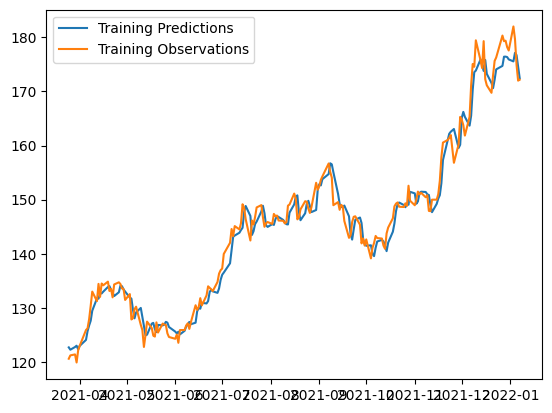

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 39ms/step


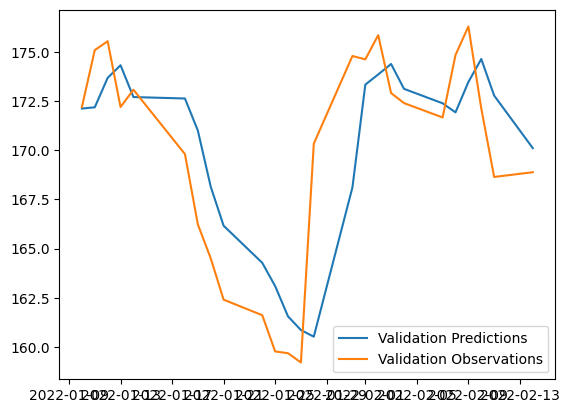

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 19ms/step


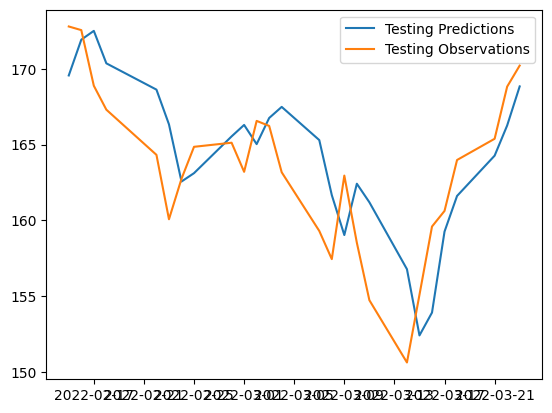

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

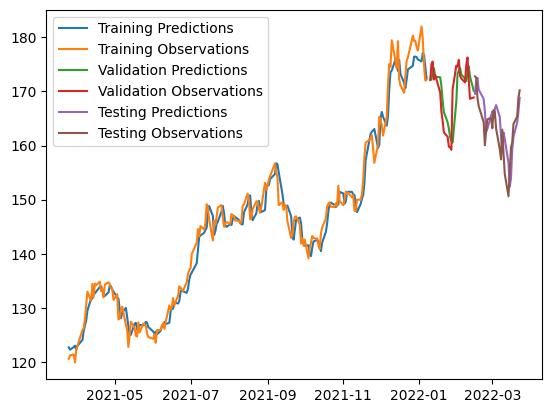

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 18ms/step


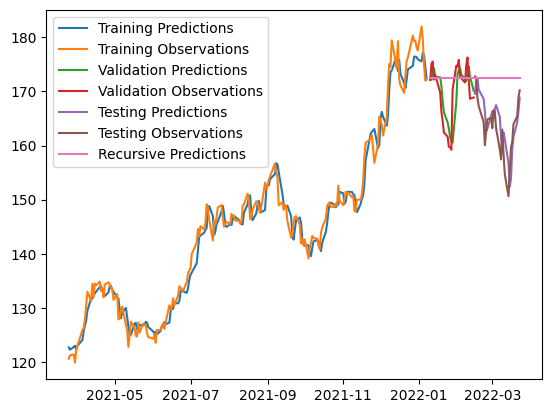

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])